<a href="https://colab.research.google.com/github/MarcusPauloFaustino1/Exercicios-Growdev/blob/main/semana02aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 

data = pd.read_csv('vgsales.csv')



# Ex 1
**Qual foi o jogo mais vendido no mundo em 2010?**

In [ ]:
data_year_2010 = data.query('Year == 2010')

max_global_sales = data_year_2010.groupby('Name')['Global_Sales'].max().idxmax()

print(f'O jogo mais vendido no mundo em 2010 foi -> {max_global_sales}')


O jogo mais vendido no mundo em 2010 foi -> Kinect Adventures!


# Ex 2
**Qual foi o gênero mais vendido na américa do norte em 2005**

In [ ]:
data_2005 = data.query('Year == 2005')

genre_2005 = data_2005.groupby('Genre')['NA_Sales'].sum().idxmax()

print(f'O gênero mais vendido na América do Norte é: {genre_2005}')


O gênero mais vendido na América do Norte é: Action


# Ex 3
**Qual foi a empresa que mais vendeu de 2005 até 2016**

In [ ]:
year_2005_2016 = data.query('Year >= 2005 & Year <= 2016')

publisher_year_2005_2016 = year_2005_2016.groupby('Publisher')['Global_Sales'].sum().idxmax()

print(f'A empresa que mais vendeu de 2005 a 2016 foi: {publisher_year_2005_2016}')

A empresa que mais vendeu de 2005 a 2016 foi: Nintendo


# Ex 4
**Qual o nome do jogo que menos foi vendido em 2008 do gênero Sports.**

In [ ]:
year_2008_genre_sports = data.query('Year == 2008 & Genre == "Sports"')

smallest_sales = year_2008_genre_sports['Global_Sales'].min()

min = year_2008_genre_sports.query(f'Global_Sales == {smallest_sales}')

min_name = min['Name']

print('Os jogos do gênero Sports menos vendidos em 2008 foram:\n')
for i in range(min_name.count()):
  print(min_name.values[i])

Os jogos do gênero Sports menos vendidos em 2008 foram:

Winning Post 7 Maximum 2008
Fab 5 Soccer
Major Dream: Major Wii Nagero! Gyroball!!
Winning Post 7 Maximum 2008
Family Jockey
G1 Jockey 4 2008
Summer Athletics


# Ex 5
**Mostre um gráfico com o total de vendas por ano.**

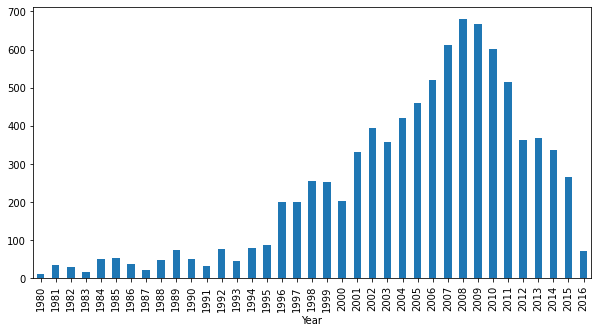

In [ ]:
years_global_sales = data.groupby('Year')['Global_Sales'].sum()

years_global_sales.plot.bar(figsize = (10,5))

# Ex 6
**Qual foi o ano com mais lançamentos de jogos?**

In [ ]:
year_biggest_launching = data.groupby('Year')['Name'].count().idxmax()

print(f'O ano com mais lançamento de jogos foi -> {year_biggest_launching}')

O ano com mais lançamento de jogos foi -> 2009


# Ex 7
**Qual a plataforma que menos lançou jogos?**

In [ ]:
platform_smallest_launching = data.groupby('Platform').count()
platform_smallest_launching_name = platform_smallest_launching['Name'].min()

platform = platform_smallest_launching.query(f'Name == {platform_smallest_launching_name}')

print(f'As duas plataformas com menor número de lançamentos foram -> {platform.index[0]} e {platform.index[1]}')


As duas plataformas com menor número de lançamentos foram -> GG e PCFX


# Ex 8
**Qual plataforma que mais gerou lucros com jogos do gênero Action desde 2009?**

In [ ]:
years_2009_and_after = data.query('Year >= 2009 & Genre == "Action"')
platform = years_2009_and_after.groupby('Platform')['Global_Sales'].max()

print(platform.idxmax())


PS3


# Ex 9
**Qual empresa teve o maior lucro (sob o teto de 0.35 milhões) de 1980 até 1995, excluindo-se a plataforma SNES.**

In [ ]:
filter_years = data.query('1980 <= Year <= 1995 & Platform != "SNES"')
biggest_profit = filter_years.groupby('Publisher').sum()
biggest_profit_filter = biggest_profit.query('Global_Sales <= 0.35').max()
biggest_profit_global_sales = biggest_profit_filter['Global_Sales'].max()

biggest_profit_publisher = biggest_profit.query(f'Global_Sales == {biggest_profit_global_sales}')

biggest_profit_publisher


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,
ITT Family Games,5383,1982,0.32,0.02,0.0,0.0,0.34


# Ex 10
**A empresa que mais lucrou no Japão em 2003 é a mesma que mais lucrou na europa nesse mesmo ano?**

In [ ]:
year_2003 = data.query('Year == 2003')

publisher_grouped = year_2003.groupby('Publisher').sum()

japan_publisher = publisher_grouped['JP_Sales'].idxmax()

eu_publisher = publisher_grouped['EU_Sales'].idxmax()

print(f'Empresa que mais lucrou no Japão: {japan_publisher}')
print(f'Empresa que mais lucrou na Europa: {eu_publisher}')
print('São a mesma empresa?')
if japan_publisher == eu_publisher:
  print(True)
else:
  print(False)






Empresa que mais lucrou no Japão: Nintendo
Empresa que mais lucrou na Europa: Electronic Arts
São a mesma empresa?
False


# Ex 11
**Qual o percentual relacionado às vendas globais de jogos de Wii (excluindo-se América do norte, japão e europa) de 2006 até 2010?**

In [ ]:
years_2006_2010 = data.query('2006 <= Year <= 2010 & Platform == "Wii"').sum()

other_sales = years_2006_2010['Other_Sales']
global_sales = years_2006_2010['Global_Sales']

percent_other = (100 * other_sales)/global_sales

print(f'O percentual é de: {percent_other:.2f}%')

O percentual é de: 8.75%


# Ex 12
**Mostre um gráfico de linhas com as vendas em diferentes plataformas ao longo dos anos.**

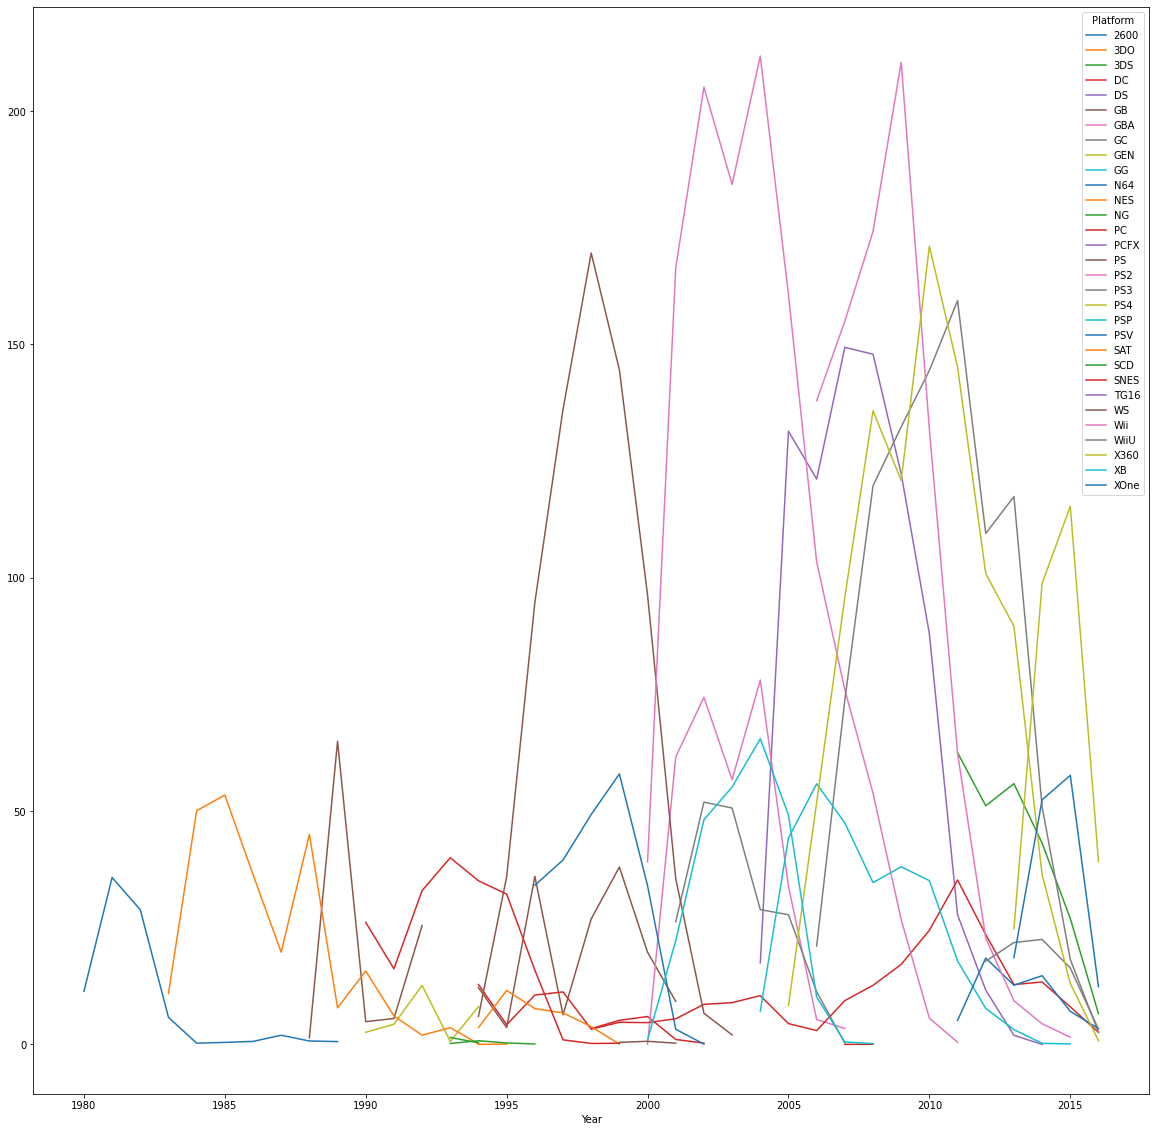

In [ ]:
import matplotlib.pyplot as plt

platforms = data.groupby(['Year','Platform'])['Global_Sales'].sum()

fig, ax = plt.subplots(figsize=(20,20))

platforms.unstack().plot(ax=ax)

# Ex 13
**Mostre um gráfico de pizza com o percentual de vendas dos diferentes gêneros de jogos.**

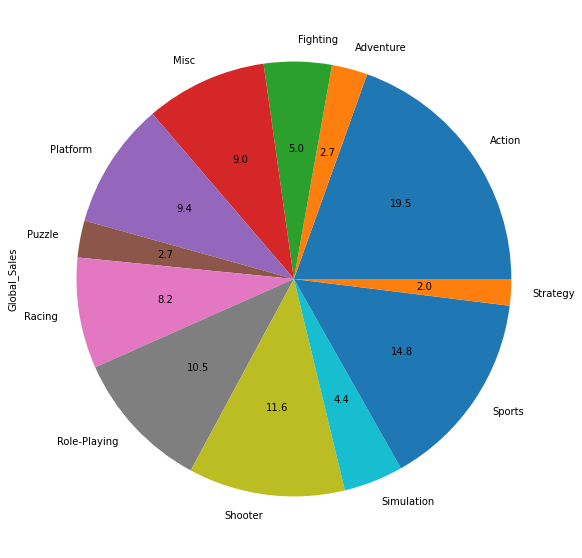

In [ ]:
'''
13)Mostre um gráfico de pizza com o percentual de vendas dos diferentes
gêneros de jogos.'''

#total_sales = data['Global_Sales'].sum()

genre = data.groupby('Genre')['Global_Sales'].sum()

genre.plot.pie(figsize=(32,10),autopct="%.1f")